# Telling labterminologie

In [1]:
import requests
import sys
import datetime
import pandas as pd
import numpy as np
sys.path.append('C:/Users/Marc/Dropbox/Development/scripts')
from xml_to_pandas import read_xml

In [2]:
url = 'http://labterminologie.nl:8877/apps/lab/helpers/tel-concepten.xquery'
# url = 'http://terminologie.test-nictiz.nl:8877/apps/lab/helpers/tel-concepten.xquery'
#url = 'http://localhost:8877/apps/lab/helpers/tel-concepten.xquery'
response = requests.get(url)
xml_data = response.content
df = read_xml(xml_data)
response.status_code

200

In [3]:
#with open('telling.xml', 'wb') as file:
#    file.write(xml_data)

In [4]:
sp = pd.read_csv('specialismen.csv')
df = pd.merge(df, sp, on='class')

## Totaal per status

Datum: 2019-12-12 11:57


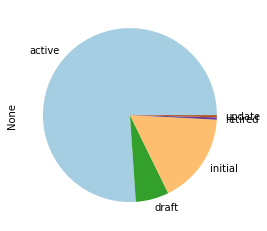

In [5]:
print('Datum: ' + str(datetime.datetime.now())[0:16])
stats = ['initial', 'draft', 'active', 'update', 'retired']
per_class = pd.pivot_table(df, values=stats, index=['class'], aggfunc=np.sum)
per_class.sum().plot.pie(figsize=(4,4), colormap='Paired')

## Totaal per specialisme

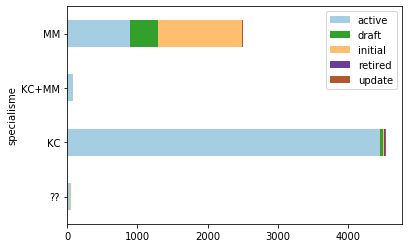

In [6]:
per_spec = pd.pivot_table(df, values=stats, index=['specialisme'], aggfunc=np.sum)
per_spec.plot.barh(stacked=True, colormap='Paired')

## Totaal per class

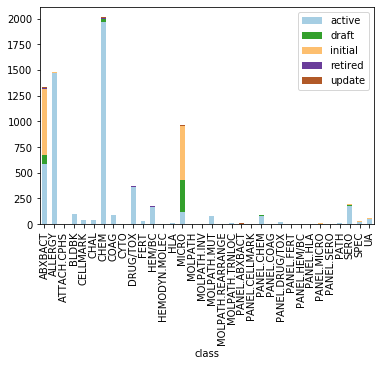

In [7]:
per_class.plot.bar(stacked=True, colormap='Paired')

## Tabel

In [8]:
table = pd.pivot_table(df, index=['specialisme', 'class'], aggfunc=np.sum, margins=True)
stats.append('total')
table[stats]

initial  draft  active  update  retired  total
specialisme class                                                            
??          ATTACH.CPHS              0      0       1       0        0      1
            HEMODYN.MOLEC            1      0       1       0        0      2
            PATH                     2      0      11       0        0     13
            SPEC                    11      1      20       0        0     32
KC          ALLERGY                  6      0    1474       0        0   1480
            BLDBK                    0      0      96       0        2     98
            CELLMARK                 0      1      44       0        0     45
            CHAL                     0      1      41       0        0     42
            CHEM                     0     21    1970       6       17   2014
            COAG                     0      1      89       0        0     90
            CYTO                     0      0       1       0        0      1
            DRUG/TOX                 0      5     361       0        3    369
            FERT                     0      0      29       0        0     29
            HEM/BC                   0      1     169       0        2    172
            HLA                      2      0       9       0        0     11
            MOLPATH.INV              0      0       2       0        0      2
            MOLPATH.TRNLOC           0      0       8       0        1      9
            PANEL.CELLMARK           0      1       5       0        0      6
            PANEL.CHEM               0      3      82       1        0     86
            PANEL.COAG               0      0       6       0        0      6
            PANEL.DRUG/TOX           0      0      18       1        0     19
            PANEL.FERT               0      0       1       0        0      1
            PANEL.HEM/BC             0      0       1       0        0      1
            PANEL.HLA                0      0       1       0        0      1
            UA                       2      1      53       2        0     58
KC+MM       MOLPATH                  0      0       5       0        0      5
            MOLPATH.MUT              0      1      75       0        0     76
            MOLPATH.REARRANGE        0      0       2       0        0      2
MM          ABXBACT                643     86     587      12        4   1332
            MICRO                  527    308     118       6        1    960
            PANEL.ABXBACT            4      2       0       1        0      7
            PANEL.MICRO              5      2       1       0        0      8
            PANEL.SERO               1      0       2       0        0      3
            SERO                     9      8     180       1        1    199
All                               1213    443    5463      30       31   7180